**Business Context:**
One of the leading woman clothing e-commerce companies would like to analyse the customer’s
behaviour by analysing customer’s demographics and reviews submitted on the website.

**Business Objectives:**
Our main objectives are as follows.

a. Performing exploratory analysis on the data to understand the patterns

b. Perform text mining tasks to understand what most frequent words are using for positive
sentiment and negative sentiment. Create word clouds for the positive & negative reviews
separately.

c. Understand sentiment among the customers on the different categories, sub categories,
products by location and age group

d. Perform predictive analytics to understand the drivers of customers who are recommending
the products.

e. Create topics and understand themes behind the topics by performing topic mining.

In [1]:
#importing the reqired pacakages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read dataset
data = pd.read_excel("/content/drive/MyDrive/Datesets/5_nlp/Womens Clothing Reviews Data.xlsx")

In [3]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [4]:
#replacing extra space by a hypen(_)
data.columns=[var.replace(' ','_') for var in data.columns]

In [5]:
data

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


<ipython-input-6-7a01b52b3c9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues')


<Axes: >

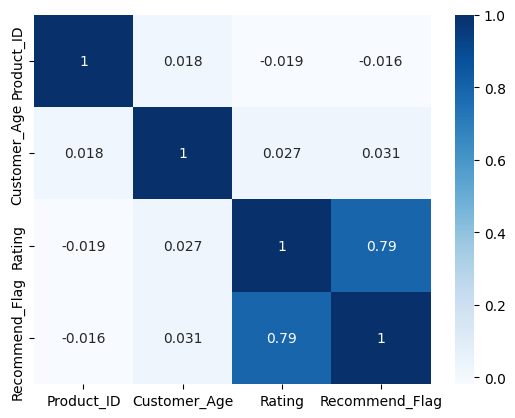

In [6]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [7]:
#cheking for null values
data.isna().sum()

Product_ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer_Age         0
Review_Title      3810
Review_Text        845
Rating               0
Recommend_Flag       0
dtype: int64

In [8]:
#since it is difficult to fill review so, its better drop the missing values
data=data.dropna()

In [9]:
data

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


#**EDA**

In [10]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Histogram of Category')

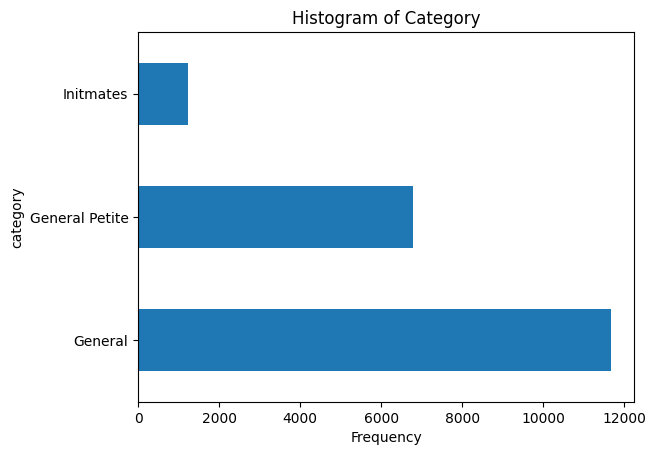

In [11]:
b=(data['Category'].value_counts())
b.plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('category')
plt.title('Histogram of Category')

From the above graph we say that maximum products are from general category

<Axes: ylabel='Subcategory1'>

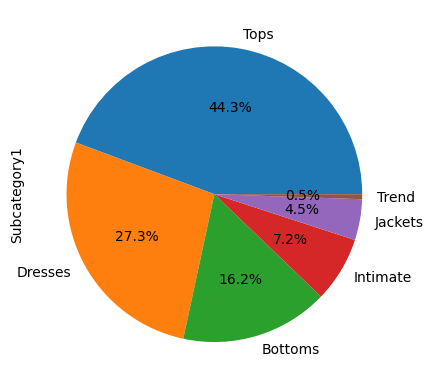

In [12]:
c=(data['Subcategory1'].value_counts())
c.plot(kind='pie',autopct='%1.1f%%')

From the above graph we say that maximum subcategory1 products are Top category

Text(0.5, 1.0, 'Histogram of Subcategory2')

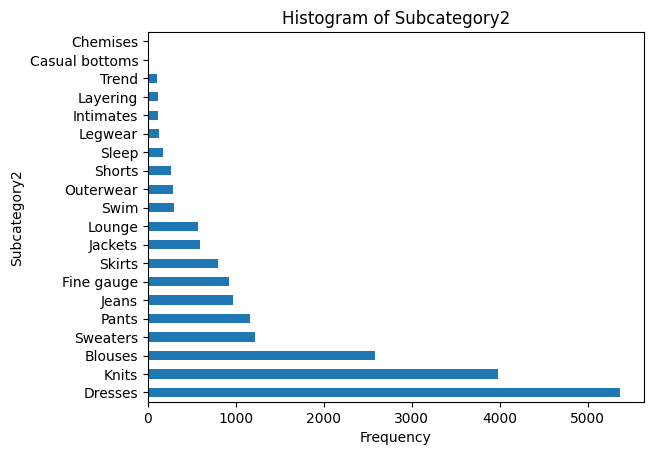

In [13]:
a=(data['SubCategory2'].value_counts())
a.plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Subcategory2')
plt.title('Histogram of Subcategory2')

The graph indicates that Dresses are the most prevalent category within the Tops category.

Text(0.5, 1.0, 'Histogram of Location')

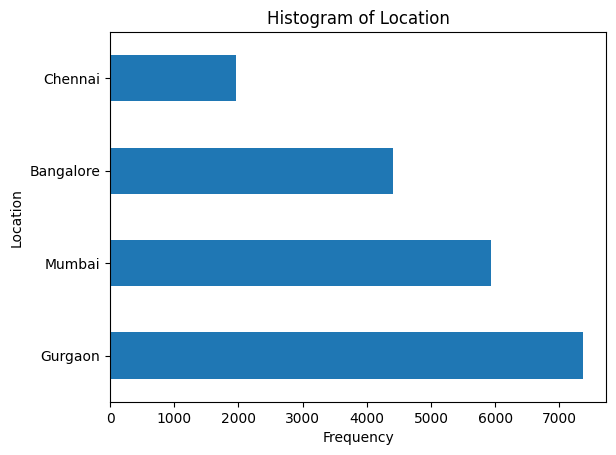

In [14]:
a=(data['Location'].value_counts())
a.plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Histogram of Location')

The majority of our customers are from Gurgaon.

<Axes: >

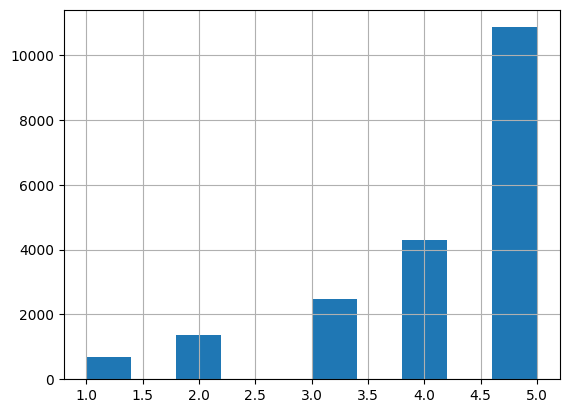

In [15]:
data['Rating'].hist()

With approximately 15,000 ratings of 4 stars or above, our business is doing Good. However, there is still room for improvement, and we can enhance it further by enhancing customer satisfaction through improved product offerings

<Axes: xlabel='Customer_Age', ylabel='Count'>

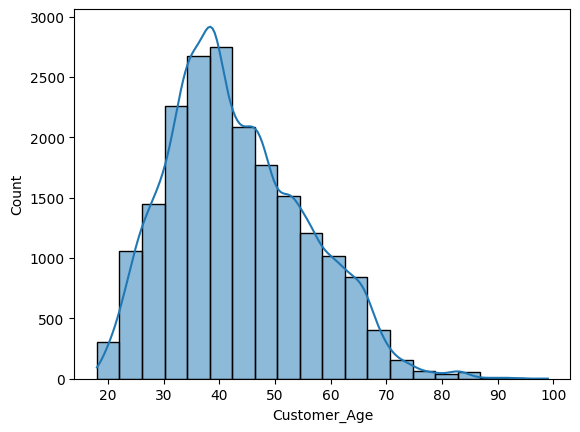

In [16]:
sns.histplot(data['Customer_Age'],kde=True,bins=20)

The largest segment of our customer base is within the age group of 30 to 40 years old.



In [17]:
data['Channel'].value_counts()

Web       11391
Mobile     8271
Name: Channel, dtype: int64

<Axes: ylabel='Channel'>

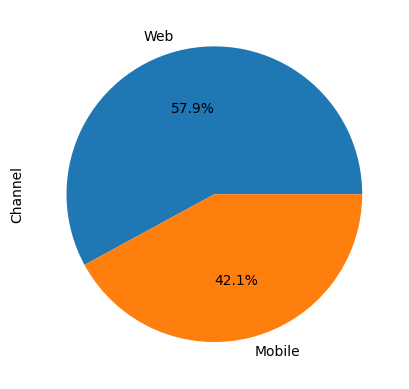

In [18]:
d=(data['Channel'].value_counts())
d.plot(kind='pie', autopct='%1.1f%%')

Our web-based customers are more than those using our mobile app.







Importing required pacakages

In [19]:
from nltk import FreqDist
from nltk import word_tokenize
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
#Before cleaning, analyzing the most frequently occurring words.
master_text = " ".join(data["Review_Text"].values)
freq_distribution = FreqDist(word_tokenize(master_text))
print(freq_distribution.most_common()[0:100])

[('.', 77904), ('the', 67631), ('i', 51609), ('and', 43831), ('it', 43702), (',', 43634), ('a', 38269), ('is', 27946), ('to', 21853), ('this', 19169), ('in', 18457), ('but', 14716), ('on', 13669), ('for', 12445), ('!', 12318), ('of', 12089), ('was', 11577), ('with', 11471), ('so', 10519), ('my', 9869), ('dress', 9255), ('that', 9033), ('not', 8825), ('I', 8494), ('size', 7788), ("n't", 7394), ('have', 7387), ('very', 7005), ("'s", 6946), ('love', 6860), ('are', 6624), ('fit', 6528), ('top', 6475), ('be', 6271), ('like', 6202), ('me', 5983), ('as', 5952), ('wear', 5703), ('too', 5374), ("'m", 5252), ('or', 5225), ('am', 5176), ('you', 5105), ('great', 5052), ('just', 4918), ('would', 4847), ('they', 4745), (')', 4725), ('(', 4679), ('5', 4509), ("''", 4420), ('at', 4330), ('fabric', 4276), ('up', 4218), ('color', 4051), ('small', 4035), ("'", 3987), ('This', 3812), ('look', 3586), ('more', 3502), ('if', 3498), ('really', 3429), ('ordered', 3363), ('little', 3340), ('perfect', 3284), ('o

We need to clean the data as it appears to be inconsistent







In [21]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def remove_special_characters(text):
    pattern='[^a-zA-Z]' ## means anything which is not a-z, A-Z, 0-9
    text = re.sub(pattern= pattern, string= text, repl = " ").strip()
    text = re.sub(pattern = "\s{2,}", string=text, repl = " ")
    return text

def clean_data(text):
    text = remove_special_characters(text)
    final_stopwords = stopwords.words("english")
    clean_text = ''
    for word in word_tokenize(text):
        if (word.lower() not in final_stopwords) and (len(word.lower()) > 2):
            clean_text = clean_text + PorterStemmer().stem(word) + " "
    return clean_text.lower().strip()

In [22]:
l=data["Review_Text"].apply(clean_data)

In [23]:
l

2        high hope dress realli want work initi order p...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt flatter due adjust front tie perfect len...
5        love traci rees dress one petit feet tall usua...
6        ade basket hte last mintu see would look like ...
                               ...                        
23481    happi snag dress great price easi slip flatter...
23482    remind matern cloth soft stretchi shini materi...
23483    fit well top see never would work glad abl tri...
23484    bought dress wed summer cute unfortun fit perf...
23485    dress love platinum feminin fit perfectli easi...
Name: Review_Text, Length: 19662, dtype: object

In [24]:
master_text = " ".join(l.values)
freq_distribution = FreqDist(word_tokenize(master_text))
print(freq_distribution.most_common()[0:100])

[('dress', 10831), ('fit', 10314), ('love', 9875), ('size', 9613), ('look', 8347), ('top', 7437), ('wear', 7191), ('like', 7049), ('color', 6509), ('great', 5306), ('would', 4558), ('order', 4493), ('fabric', 4402), ('small', 4209), ('realli', 3514), ('nice', 3420), ('perfect', 3407), ('one', 3365), ('littl', 3346), ('tri', 3294), ('flatter', 3262), ('soft', 3019), ('well', 3014), ('beauti', 2964), ('comfort', 2917), ('back', 2910), ('shirt', 2721), ('bought', 2662), ('work', 2618), ('cute', 2617), ('usual', 2600), ('bit', 2594), ('larg', 2519), ('materi', 2500), ('sweater', 2462), ('length', 2416), ('much', 2412), ('waist', 2399), ('run', 2398), ('jean', 2341), ('also', 2328), ('petit', 2296), ('long', 2211), ('short', 2188), ('think', 2179), ('got', 2157), ('make', 2115), ('even', 2099), ('get', 2096), ('purchas', 2093), ('medium', 2056), ('feel', 2029), ('skirt', 2021), ('qualiti', 1997), ('retail', 1968), ('pretti', 1953), ('review', 1934), ('store', 1914), ('want', 1878), ('pant',

**"would,look, one, tri ,well,bought,think, got make, even,way,could and still "** are unnecessary words so we need to remove them

In [25]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def remove_special_characters(text):
    pattern='[^a-zA-Z]' ## means anything which is not a-z, A-Z, 0-9
    text = re.sub(pattern= pattern, string= text, repl = " ").strip()
    text = re.sub(pattern = "\s{2,}", string=text, repl = " ")
    return text

def clean_data(text, custom_stopwords=None):
    custom_stopwords = ["would", "one", "tri",'think','got','make','even','way','could','and','still','are' ]
    text = remove_special_characters(text)
    final_stopwords = stopwords.words("english") if  custom_stopwords is None else stopwords.words("english") + custom_stopwords
    clean_text = ''
    for word in word_tokenize(text):
        if (word.lower() not in final_stopwords) and (len(word.lower())>2):
            clean_text = clean_text + PorterStemmer().stem(word) + " "
    return clean_text.lower().strip()

In [26]:
m=data['Review_Text'].apply(remove_special_characters)

In [27]:
m

2        I had such high hopes for this dress and reall...
3        I love love love this jumpsuit it s fun flirty...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses but this one is not...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes soft stretc...
23483    This fit well but the top was very see through...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 19662, dtype: object

In [28]:
cleaned_review_text=data['Review_Text'].apply(clean_data)

In [29]:
data

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [30]:
#now we have cleaned data
 (cleaned_review_text)

2        high hope dress realli want work initi order p...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt flatter due adjust front tie perfect len...
5        love traci rees dress petit feet tall usual we...
6        ade basket hte last mintu see look like person...
                               ...                        
23481    happi snag dress great price easi slip flatter...
23482    remind matern cloth soft stretchi shini materi...
23483    fit well top see never work glad abl tri store...
23484    bought dress wed summer cute unfortun fit perf...
23485    dress love platinum feminin fit perfectli easi...
Name: Review_Text, Length: 19662, dtype: object

In [ ]:
#appending cleaned column in our dataframe(data)
data['clean'] = cleaned_review_text


In [32]:
data.head(1)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,clean
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hope dress realli want work initi order p...


In [33]:
master_text = " ".join(cleaned_review_text.values)
freq_distribution = FreqDist(word_tokenize(master_text))
print(freq_distribution.most_common()[0:100])

[('dress', 10831), ('fit', 10314), ('love', 9875), ('size', 9613), ('look', 8347), ('top', 7437), ('wear', 7191), ('like', 7049), ('color', 6509), ('great', 5306), ('order', 4493), ('fabric', 4402), ('small', 4209), ('realli', 3514), ('nice', 3420), ('perfect', 3407), ('littl', 3346), ('tri', 3293), ('flatter', 3262), ('soft', 3019), ('well', 3014), ('beauti', 2964), ('comfort', 2917), ('back', 2910), ('shirt', 2721), ('bought', 2662), ('work', 2618), ('cute', 2617), ('usual', 2600), ('bit', 2594), ('larg', 2519), ('materi', 2500), ('sweater', 2462), ('length', 2416), ('much', 2412), ('waist', 2399), ('run', 2398), ('jean', 2341), ('also', 2328), ('petit', 2296), ('long', 2211), ('short', 2188), ('get', 2096), ('purchas', 2093), ('medium', 2056), ('feel', 2029), ('skirt', 2021), ('qualiti', 1997), ('retail', 1968), ('pretti', 1953), ('review', 1934), ('store', 1914), ('want', 1878), ('pant', 1866), ('sleev', 1864), ('style', 1772), ('good', 1762), ('made', 1735), ('lb', 1721), ('see', 

Now that the review text has been cleaned, we can proceed with  our analysis

In [272]:
#df_neg_rvw=data is dataframe of negative ratings 2 or below
#df_pos_rvw=data is dataframe of positive ratings 4 or above
df_neg_rvw=data[((data['Rating']==1) | (data['Rating']==2))]
df_pos_rvw=data[((data['Rating']==4) | (data['Rating']==5))]

In [35]:
#importing word cloud pakage
from wordcloud import WordCloud

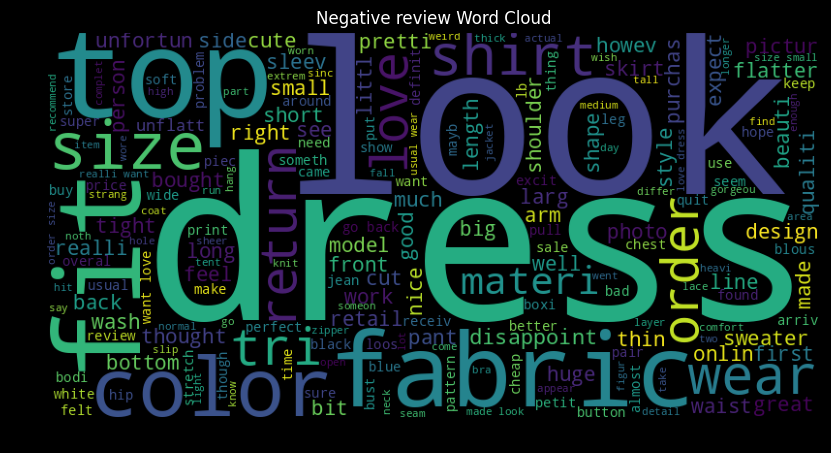

In [36]:
plt.figure( figsize=(10,10), facecolor='k')
clean_text = " ".join(df_neg_rvw['clean'].values)
wordcloud = WordCloud(background_color = "black", width=800, height=400).generate(clean_text)
plt.title('Negative review Word Cloud', color='white')
plt.imshow(wordcloud)

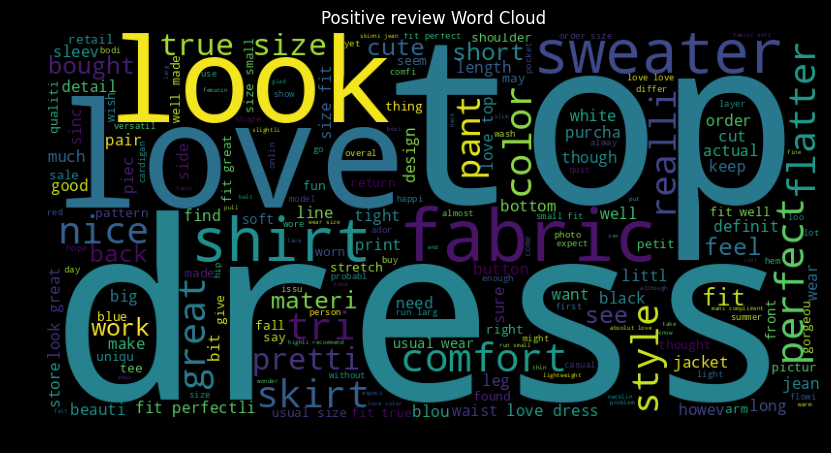

In [37]:
plt.figure( figsize=(10,10), facecolor='k')
clean_text = " ".join(df_pos_rvw['clean'].values)
wordcloud = WordCloud(background_color = "black", width=800, height=400).generate(clean_text)
plt.title('Positive review Word Cloud', color='white')
plt.imshow(wordcloud)

In [38]:
data.head(1)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,clean
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hope dress realli want work initi order p...


In [ ]:
#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [40]:
sid = SentimentIntensityAnalyzer()

In [ ]:
sid = SentimentIntensityAnalyzer()
data['Sentiment'] = data['clean'].apply(lambda x: sid.polarity_scores(x)['compound'])
sentiment_distribution = data['Sentiment'].describe()

negative_threshold = -0.2
positive_threshold = 0.2

# Assigning sentiment labels based on thresholds
data['Sentiment_Label'] = pd.cut(data['Sentiment'], bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                                 labels=['Negative', 'Neutral', 'Positive'])


In [42]:
data.head(2)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,clean,Sentiment,Sentiment_Label
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hope dress realli want work initi order p...,0.8957,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirti fabul everi...,0.9753,Positive


In [43]:
#sentiment_by_category
sentiment_by_category=data.groupby(['Category','Sentiment_Label'])['Sentiment'].mean()
sentiment_by_category=pd.DataFrame(sentiment_by_category)
sentiment_by_category

Sentiment
Category       Sentiment_Label           
General        Negative         -0.437079
               Neutral           0.012301
               Positive          0.807826
General Petite Negative         -0.437754
               Neutral           0.017967
               Positive          0.807755
Initmates      Negative         -0.425177
               Neutral           0.018820
               Positive          0.799644

In [44]:
#sentiment_by_subcategory
sentiment_by_sub1= data.groupby(['Subcategory1','Sentiment_Label'])['Sentiment'].mean()
sentiment_by_sub1=pd.DataFrame(sentiment_by_sub1)
sentiment_by_sub1

Sentiment
Subcategory1 Sentiment_Label           
Bottoms      Negative         -0.420011
             Neutral           0.011346
             Positive          0.817915
Dresses      Negative         -0.449939
             Neutral           0.016137
             Positive          0.803379
Intimate     Negative         -0.436180
             Neutral           0.020197
             Positive          0.800159
Jackets      Negative         -0.569270
             Neutral           0.038300
             Positive          0.809259
Tops         Negative         -0.423560
             Neutral           0.012502
             Positive          0.807160
Trend        Negative         -0.408650
             Neutral          -0.063950
             Positive          0.770292

In [45]:
#sentiment_by_location
sentiment_by_loc= data.groupby(['Location','Sentiment_Label'])['Sentiment'].mean()
sentiment_by_loc=pd.DataFrame(sentiment_by_loc)
sentiment_by_loc

Sentiment
Location  Sentiment_Label           
Bangalore Negative         -0.404075
          Neutral           0.018002
          Positive          0.807330
Chennai   Negative         -0.410016
          Neutral           0.009616
          Positive          0.802121
Gurgaon   Negative         -0.457491
          Neutral           0.014962
          Positive          0.809226
Mumbai    Negative         -0.444807
          Neutral           0.013565
          Positive          0.806568

In [46]:
#sentiment_by_age_group
sentiment_by_age_group = data.groupby(pd.cut(data['Customer_Age'], bins=[0, 20, 30, 40, 50, float('inf')]))['Sentiment'].mean()
sentiment_by_age_group

Customer_Age
(0.0, 20.0]     0.757903
(20.0, 30.0]    0.744473
(30.0, 40.0]    0.746351
(40.0, 50.0]    0.745081
(50.0, inf]     0.747443
Name: Sentiment, dtype: float64

In [48]:
#sentiment_by_ch
sentiment_by_ch= data.groupby(['Channel','Sentiment_Label'])['Sentiment'].mean()
sentiment_by_ch=pd.DataFrame(sentiment_by_ch)
sentiment_by_ch

Sentiment
Channel Sentiment_Label           
Mobile  Negative         -0.421058
        Neutral           0.017823
        Positive          0.811328
Web     Negative         -0.447661
        Neutral           0.012418
        Positive          0.804359

#Predictive Modelling

**TfidfVectorizer** is a tool used in natural language processing (NLP) to convert text data into numerical vectors, giving more weight to words that are important to a document relative to the entire dataset, while reducing the importance of common words.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
data.head(1)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,clean,Sentiment,Sentiment_Label
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hope dress realli want work initi order p...,0.8957,Positive


In [51]:
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(data['clean'])
y = data['Recommend_Flag']

here

spliting the dataset in train and test

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [54]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
#predicting train and test values
y_pred_test = model.predict(X_test)
y_pred_train=model.predict(X_train)


In [57]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63      2672
           1       0.90      0.97      0.93     12074

    accuracy                           0.89     14746
   macro avg       0.84      0.75      0.78     14746
weighted avg       0.88      0.89      0.88     14746

              precision    recall  f1-score   support

           0       0.74      0.49      0.59       903
           1       0.89      0.96      0.93      4013

    accuracy                           0.88      4916
   macro avg       0.82      0.73      0.76      4916
weighted avg       0.87      0.88      0.87      4916



In [58]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[ 1400  1272]
 [  383 11691]]
[[ 446  457]
 [ 153 3860]]


Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.model_selection import GridSearchCV

commenting below cells bcoz these were taking too much time to run

In [61]:
#GCV_tree=GridSearchCV(DecisionTreeClassifier(),cv=5,param_grid={'max_depth':[3,4,5,6],'max_leaf_nodes':[10,12,16,18,20,30],'max_features':[4,6,8,10]},scoring='roc_auc',verbose=True)

In [62]:
#GCV_tree.fit(X_train,y_train)

In [63]:
#GCV_tree.best_params_

In [64]:
tree_model=DecisionTreeClassifier(max_depth=6,max_features=10,max_leaf_nodes=30)

In [65]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features=10, max_leaf_nodes=30)

In [66]:
#predicting train and test values
y_pred_test = tree_model.predict(X_test)
y_pred_train=tree_model.predict(X_train)

In [67]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.02      0.04      2672
           1       0.82      1.00      0.90     12074

    accuracy                           0.82     14746
   macro avg       0.82      0.51      0.47     14746
weighted avg       0.82      0.82      0.75     14746

              precision    recall  f1-score   support

           0       0.38      0.01      0.01       903
           1       0.82      1.00      0.90      4013

    accuracy                           0.82      4916
   macro avg       0.60      0.50      0.46      4916
weighted avg       0.74      0.82      0.74      4916



In [68]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[   52  2620]
 [   11 12063]]
[[   6  897]
 [  10 4003]]


#Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
radm_clf=RandomForestClassifier(n_estimators=50,max_depth=6,max_leaf_nodes=10,max_features=10,n_jobs=-1)

In [72]:
radm_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=10, max_leaf_nodes=10,
                       n_estimators=50, n_jobs=-1)

In [73]:
y_pred_test = radm_clf.predict(X_test)
y_pred_train= radm_clf.predict(X_train)

In [74]:
print(classification_report(y_train, y_pred_train,zero_division=0))
print(classification_report(y_test, y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2672
           1       0.82      1.00      0.90     12074

    accuracy                           0.82     14746
   macro avg       0.41      0.50      0.45     14746
weighted avg       0.67      0.82      0.74     14746

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       903
           1       0.82      1.00      0.90      4013

    accuracy                           0.82      4916
   macro avg       0.41      0.50      0.45      4916
weighted avg       0.67      0.82      0.73      4916



In [75]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[    0  2672]
 [    0 12074]]
[[   0  903]
 [   0 4013]]


In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC(kernel='rbf')

In [78]:
svc.fit(X_train,y_train)

SVC()

In [79]:
y_pred_test = svc.predict(X_test)
y_pred_train= svc.predict(X_train)

In [80]:
print(classification_report(y_train, y_pred_train,zero_division=0))
print(classification_report(y_test, y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2672
           1       0.96      0.99      0.98     12074

    accuracy                           0.96     14746
   macro avg       0.96      0.90      0.93     14746
weighted avg       0.96      0.96      0.96     14746

              precision    recall  f1-score   support

           0       0.76      0.49      0.60       903
           1       0.89      0.97      0.93      4013

    accuracy                           0.88      4916
   macro avg       0.83      0.73      0.76      4916
weighted avg       0.87      0.88      0.87      4916



In [81]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[ 2151   521]
 [   86 11988]]
[[ 443  460]
 [ 137 3876]]


Among all the models, SVC (Support Vector Classifier) demonstrates the best performance.







#Predicitive Model on rating

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

In [87]:
data.shape

(19662, 14)

In [ ]:
data.head(1)

In [193]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['clean'])
y = data['Rating']

In [194]:
#imbalnce problem need to balance
pd.Series(y).value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [196]:
#since data is huge so using undersampling technique
undersampler = RandomUnderSampler(random_state=42)

X_train_resample, y_train_resample = undersampler.fit_resample(X_train,y_train)

In [197]:
#data is balanced
pd.Series(y_train_resample).value_counts()

1    530
2    530
3    530
4    530
5    530
Name: Rating, dtype: int64

In [198]:
(X_train_resample).shape

(2650, 1000)

#Logistic regression without tuning

In [ ]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
model = LogisticRegression()
model.fit(X_train_resample, y_train_resample)

LogisticRegression()

In [ ]:
#predicting train and test values
y_pred_test = model.predict(X_test)
y_pred_train=model.predict(X_train_resample)


In [ ]:
print(classification_report(y_train_resample, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.71      0.77      0.74       530
           2       0.68      0.64      0.66       530
           3       0.68      0.60      0.64       530
           4       0.67      0.65      0.66       530
           5       0.77      0.86      0.82       530

    accuracy                           0.70      2650
   macro avg       0.70      0.70      0.70      2650
weighted avg       0.70      0.70      0.70      2650

              precision    recall  f1-score   support

           1       0.18      0.51      0.27       161
           2       0.21      0.27      0.23       339
           3       0.31      0.35      0.33       648
           4       0.33      0.36      0.34      1064
           5       0.81      0.64      0.71      2704

    accuracy                           0.51      4916
   macro avg       0.37      0.43      0.38      4916
weighted avg       0.58      0.51      0.54      4916



#Logistic Regression with hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}


logistic_reg = LogisticRegression()

grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_resample, y_train_resample)

In [205]:
grid_search.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

In [206]:
model = LogisticRegression(C=0.1,class_weight=None,penalty='l2',solver='liblinear')
model.fit(X_train_resample, y_train_resample)

LogisticRegression(C=0.1, solver='liblinear')

In [207]:
#predicting train and test values
y_pred_test = model.predict(X_test)
y_pred_train=model.predict(X_train_resample)


In [208]:
print(classification_report(y_train_resample, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.57      0.74      0.65       530
           2       0.61      0.44      0.51       530
           3       0.58      0.44      0.50       530
           4       0.56      0.49      0.52       530
           5       0.62      0.85      0.71       530

    accuracy                           0.59      2650
   macro avg       0.59      0.59      0.58      2650
weighted avg       0.59      0.59      0.58      2650

              precision    recall  f1-score   support

           1       0.17      0.61      0.27       161
           2       0.20      0.20      0.20       339
           3       0.34      0.29      0.31       648
           4       0.37      0.32      0.34      1064
           5       0.79      0.74      0.76      2704

    accuracy                           0.55      4916
   macro avg       0.37      0.43      0.38      4916
weighted avg       0.58      0.55      0.56      4916



In [113]:
from sklearn.svm import SVC


In [114]:
svc = SVC(kernel='rbf')

In [115]:
svc.fit(X_train_resample,y_train_resample)

SVC()

In [116]:
y_pred_test = svc.predict(X_test)
y_pred_train= svc.predict(X_train_resample)

In [117]:
print(classification_report(y_train_resample, y_pred_train,zero_division=0))
print(classification_report(y_test, y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95       530
           2       0.96      0.93      0.94       530
           3       0.95      0.91      0.93       530
           4       0.94      0.93      0.94       530
           5       0.94      0.98      0.96       530

    accuracy                           0.94      2650
   macro avg       0.94      0.94      0.94      2650
weighted avg       0.94      0.94      0.94      2650

              precision    recall  f1-score   support

           1       0.17      0.49      0.25       161
           2       0.19      0.25      0.22       339
           3       0.30      0.32      0.31       648
           4       0.33      0.41      0.36      1064
           5       0.82      0.60      0.70      2704

    accuracy                           0.50      4916
   macro avg       0.36      0.41      0.37      4916
weighted avg       0.58      0.50      0.53      4916



In [121]:
from sklearn.svm import SVC

svc = SVC()

# Define a parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],

}

In [ ]:
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc')

# Perform grid search on the resampled training data
grid_search.fit(X_train_resample, y_train_resample)

In [132]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_params

{'C': 0.1, 'kernel': 'linear'}

In [133]:
# Train SVC classifier with best parameters on the full training data
best_svc = SVC(**best_params)
best_svc.fit(X_train_resample, y_train_resample)

# Make predictions on the testing data
y_pred_test = best_svc.predict(X_test)
y_pred_train = best_svc.predict(X_train_resample)

In [134]:
print(classification_report(y_train_resample, y_pred_train,zero_division=0))
print(classification_report(y_test, y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           1       0.59      0.57      0.58       530
           2       0.53      0.39      0.45       530
           3       0.45      0.47      0.46       530
           4       0.46      0.58      0.51       530
           5       0.68      0.69      0.68       530

    accuracy                           0.54      2650
   macro avg       0.54      0.54      0.54      2650
weighted avg       0.54      0.54      0.54      2650

              precision    recall  f1-score   support

           1       0.19      0.46      0.27       161
           2       0.22      0.22      0.22       339
           3       0.32      0.36      0.34       648
           4       0.31      0.47      0.38      1064
           5       0.82      0.56      0.67      2704

    accuracy                           0.49      4916
   macro avg       0.37      0.42      0.37      4916
weighted avg       0.58      0.49      0.52      4916



XGBOOST

In [174]:
from sklearn.ensemble import GradientBoostingClassifier

In [175]:
gb= GradientBoostingClassifier()
gb.fit(X_train_resample, y_train_resample)

GradientBoostingClassifier()

In [176]:
y_pred_test = gb.predict(X_test)
y_pred_train = gb.predict(X_train_resample)

In [177]:
print(classification_report(y_train_resample, y_pred_train,zero_division=0))
print(classification_report(y_test, y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           1       0.84      0.86      0.85       530
           2       0.78      0.81      0.79       530
           3       0.82      0.73      0.77       530
           4       0.80      0.79      0.80       530
           5       0.86      0.90      0.88       530

    accuracy                           0.82      2650
   macro avg       0.82      0.82      0.82      2650
weighted avg       0.82      0.82      0.82      2650

              precision    recall  f1-score   support

           1       0.13      0.40      0.20       161
           2       0.14      0.23      0.17       339
           3       0.25      0.31      0.28       648
           4       0.31      0.34      0.32      1064
           5       0.79      0.56      0.65      2704

    accuracy                           0.45      4916
   macro avg       0.33      0.37      0.33      4916
weighted avg       0.55      0.45      0.48      4916



#Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [180]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 7]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()


In [181]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=4,scoring='roc_auc',verbose=True,n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train_resample, y_train_resample)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=True)

In [182]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

In [183]:
rf=RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=50)

In [184]:
rf.fit(X_train_resample,y_train_resample)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [185]:
y_pred_test = rf.predict(X_test)
y_pred_train =rf.predict(X_train_resample)

In [191]:
print(classification_report(y_train_resample, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.76      0.88      0.81       530
           2       0.85      0.75      0.80       530
           3       0.84      0.73      0.78       530
           4       0.83      0.76      0.79       530
           5       0.77      0.91      0.83       530

    accuracy                           0.81      2650
   macro avg       0.81      0.81      0.80      2650
weighted avg       0.81      0.81      0.80      2650

              precision    recall  f1-score   support

           1       0.15      0.54      0.23       161
           2       0.17      0.23      0.20       339
           3       0.26      0.22      0.24       648
           4       0.32      0.30      0.31      1064
           5       0.75      0.65      0.70      2704

    accuracy                           0.49      4916
   macro avg       0.33      0.39      0.33      4916
weighted avg       0.53      0.49      0.50      4916



"Among all other models, logistic regression with hyperparameter tuning gives the best results."






#LDA

In [239]:
import gensim
from gensim import corpora

In [241]:
doc=data['clean']

In [249]:
#Splits each document into tokens (words) and stores them in a list.
token=[doc.split() for doc in doc]

In [269]:
#Creates a dictionary mapping each word to a unique numerical ID
dictionary=corpora.Dictionary(token)

In [270]:
#word of id=2
dictionary.get(2)

'comfort'

In [256]:
#Converts each document into a bag-of-words representation, where each word is represented by its ID and its frequency in the document
doc_term_matrix=[dictionary.doc2bow(doc) for doc in token]

In [258]:
LDA=gensim.models.ldamodel.LdaModel

In [ ]:
#Creates an LDA model with 10 topics
ldamodel=LDA(doc_term_matrix,num_topics=10,id2word=dictionary)

In [263]:
# Prints out the topics discovered by the LDA model, along with the most probable words for each topic.
ldamodel.print_topics()

[(0,
  '0.031*"dress" + 0.023*"size" + 0.020*"fit" + 0.018*"look" + 0.017*"like" + 0.015*"small" + 0.015*"top" + 0.015*"love" + 0.012*"order" + 0.010*"fabric"'),
 (1,
  '0.080*"dress" + 0.038*"wear" + 0.024*"love" + 0.020*"comfort" + 0.019*"compliment" + 0.019*"great" + 0.015*"mani" + 0.014*"fit" + 0.011*"wore" + 0.011*"perfect"'),
 (2,
  '0.041*"size" + 0.021*"fit" + 0.020*"true" + 0.018*"wear" + 0.018*"love" + 0.016*"dress" + 0.014*"look" + 0.012*"like" + 0.011*"great" + 0.010*"color"'),
 (3,
  '0.020*"dress" + 0.017*"store" + 0.017*"color" + 0.015*"tri" + 0.015*"love" + 0.013*"top" + 0.013*"onlin" + 0.012*"look" + 0.011*"saw" + 0.011*"order"'),
 (4,
  '0.040*"top" + 0.027*"color" + 0.025*"fit" + 0.025*"look" + 0.023*"love" + 0.021*"like" + 0.018*"size" + 0.015*"littl" + 0.014*"realli" + 0.013*"dress"'),
 (5,
  '0.024*"great" + 0.023*"color" + 0.021*"love" + 0.018*"sweater" + 0.016*"shirt" + 0.016*"fit" + 0.015*"wear" + 0.013*"purchas" + 0.013*"like" + 0.012*"soft"'),
 (6,
  '0.026*"